<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용



- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 기초통계정보 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**2) 정규화**

In [6]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [8]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
# 선언하기
model = LinearRegression()

In [10]:
# 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# 예측하기
y_pred = model.predict(x_test)

In [12]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.4962689389088695
R2-Score: 0.7430693569118817


## 4.2.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [13]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [14]:
# 선언하기
model = KNeighborsRegressor(n_neighbors=5)

In [15]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [16]:
# 예측하기
y_pred = model.predict(x_test)

In [17]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.0527631578947365
R2-Score: 0.7860470863341451


## 4.3.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [18]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
# 선언하기
model = DecisionTreeRegressor(max_depth=10,
                             random_state=2022)

In [20]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=2022)

In [21]:
# 예측하기
y_pred = model.predict(x_test)

In [22]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.3855986842105263
R2-Score: 0.7045721756033901


## 4.4.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [23]:
# 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# 선언하기
model = RandomForestRegressor(max_depth=10,
                             random_state=2022)

In [25]:
# 학습하기
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=2022)

In [26]:
# 예측하기
y_pred = model.predict(x_test)

In [27]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.465881455087647
R2-Score: 0.8454412226909755


## 4.5.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [28]:
# 불러오기
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# 선언하기
model = XGBRegressor(max_depth=10,
                    random_state=2022)

In [30]:
# 학습하기
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# 예측하기
y_pred = model.predict(x_test)

In [32]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.4090699515844647
R2-Score: 0.8463536896732412


## 4.5.튜닝
- Random Search  
- Grid Search

## 4.5.2튜닝 - Grid Search

In [35]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 매개변수 값 범위 선언(=변수 선언)
param = {'max_depth':range(3, 10),
         'min_samples_split':range(2, 11),
        'n_estimators':range(50, 121, 10)}

# 기본 모델 선언
model_rfc = RandomForestRegressor(random_state=2022)

# 튜닝
model = GridSearchCV(model_rfc,
                          param,
                          cv=10,
                          n_jobs=-1)
# 학습
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.48479000592354
R2-Score: 0.8417822772000467


scoring의 값을 별도로 지정해 주지 않을 시, GridSearchCV와 RandomizedSearchCV 모두 scoring의디폴트 값이 None이기는 하나,

이러한 경우 튜닝을 진행하는 알고리즘 내 자체적으로 존재하는 score 메소드를 사용합니다.

대체로 회귀의 경우 r2, 분류의 경우 accuracy를 score 메소드에서 사용합니다.

In [36]:
print('최적파라미터:',model.best_params_)
print('-' * 70)
print('최고성능:', model.best_score_)

최적파라미터: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 60}
----------------------------------------------------------------------
최고성능: 0.8646411197743774


In [37]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 2022,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(random_state=2022),
 'n_jobs': -1,
 'param_grid': {'max_depth': range(3, 10),
  'min_samples_split': range(2, 11),
  'n_estimators': range(50, 121, 10)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

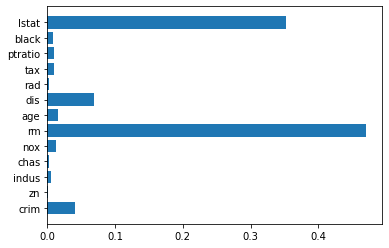

In [38]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

In [39]:
# 불러오기
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 매개변수 값 범위 선언(=변수 선언)
grid_param = {'max_depth':range(5, 16),
             'n_estimators':range(50, 151, 10)}

# 기본 모델 선언
model_xgb = XGBRegressor(random_state=2022)

# 튜닝
model = GridSearchCV(model_xgb,
                    grid_param,
                    cv=10,
                    n_jobs=-1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.4090698888427333
R2-Score: 0.8463536952242274


scoring의 값을 별도로 지정해 주지 않을 시, GridSearchCV와 RandomizedSearchCV 모두 scoring의디폴트 값이 None이기는 하나,

이러한 경우 튜닝을 진행하는 알고리즘 내 자체적으로 존재하는 score 메소드를 사용합니다.

대체로 회귀의 경우 r2, 분류의 경우 accuracy를 score 메소드에서 사용합니다.

In [40]:
print('최적파라미터:',model.best_params_)
print('-' * 70)
print('최고성능:', model.best_score_)

최적파라미터: {'max_depth': 10, 'n_estimators': 80}
----------------------------------------------------------------------
최고성능: 0.8679089855256074


In [41]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__enable_categorical': False,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_state': 2022,
 'estimator__reg_alpha': None,
 'estimator__reg_lambda': None,
 'estimator__scale_pos_weight': None,
 'estimator__subsample': None,
 'estimator__tree_method': None,
 'estimator__validate_paramet

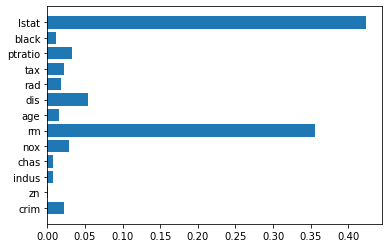

In [42]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()